<a href="https://colab.research.google.com/github/CharlyPierce/Basico/blob/main/IA_best_praxis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
def buil_fun(M_lr):
  m_lr=tf.keras.optimizers.schedules.ExponentialDecay(0.9,decay_steps=30,decay_rate=0.01)#LR decae monotono
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))#lr=M_lr ->usamos para caida cte
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=m_lr),#learning_rate=m_lr ->usamos con caida exponencial
                loss=tf.losses.MeanSquaredError(),
                metrics=[tf.metrics.RootMeanSquaredError()])           
  return model
def train_model(model,feature,label,batch_size,epochs,vs):
  history=model.fit(feature,label,batch_size=batch_size,epochs=epochs,validation_split=vs)
  # tw=model.get_weights()[0]
  # tb=model.get_weights()[1]
  return history

In [ ]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])
#Cambiamos a array para el validation split
my_feature=np.array(my_feature)
my_label=np.array(my_label)

In [ ]:
m_mo=buil_fun(0.01)
history=train_model(m_mo,my_feature,my_label,1,30,0.34)
res=pd.DataFrame(history.history)
epochs=history.epoch

Epoch 1/30
7/7 [==============================] - 0s 21ms/step - loss: 21.0688 - root_mean_squared_error: 4.5901 - val_loss: 2.2853 - val_root_mean_squared_error: 1.5117
Epoch 2/30
7/7 [==============================] - 0s 8ms/step - loss: 2.1196 - root_mean_squared_error: 1.4559 - val_loss: 5.9044 - val_root_mean_squared_error: 2.4299
Epoch 3/30
7/7 [==============================] - 0s 9ms/step - loss: 1.5233 - root_mean_squared_error: 1.2342 - val_loss: 3.4932 - val_root_mean_squared_error: 1.8690
Epoch 4/30
7/7 [==============================] - 0s 8ms/step - loss: 1.3472 - root_mean_squared_error: 1.1607 - val_loss: 2.9754 - val_root_mean_squared_error: 1.7249
Epoch 5/30
7/7 [==============================] - 0s 6ms/step - loss: 1.2319 - root_mean_squared_error: 1.1099 - val_loss: 2.9339 - val_root_mean_squared_error: 1.7129
Epoch 6/30
7/7 [==============================] - 0s 5ms/step - loss: 1.2137 - root_mean_squared_error: 1.1017 - val_loss: 2.8204 - val_root_mean_squared_erro

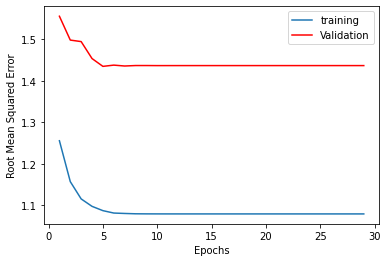

In [ ]:
def plot_loss(res,epochs):
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Root Mean Squared Error')
  plt.plot(epochs[1:],res['root_mean_squared_error'][1:],label='training')
  plt.plot(epochs[1:],res['val_root_mean_squared_error'][1:],c='r',label='Validation')
  plt.legend()
  plt.show()
plot_loss(res,epochs)
#Debido a la poca cantidad de datos no es fiable basarse en el gráfico

In [ ]:
res

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,49.640110,7.045574,0.220912,0.470013
1,1.045901,1.022693,0.096416,0.310509
2,1.024778,1.012313,0.078566,0.280296
3,1.041979,1.020774,0.306659,0.553768
4,0.957279,0.978407,0.749139,0.865528
5,0.989280,0.994626,0.424056,0.651196
6,0.974498,0.987167,0.310894,0.557579
7,0.955446,0.977469,0.320989,0.566559
8,0.936678,0.967821,0.307386,0.554424
9,0.930687,0.964721,0.344191,0.586678
